Mostly clean up, some exploratory analysis too

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

# Import (& some prelim clean up)

In [2]:
#import dataset
users = pd.read_csv(os.path.join('datasets', 'train_users_2.csv'), index_col = 'id')

#renaming a few things
users.rename(columns = {'date_account_created' : 'account', 'timestamp_first_active' : 'active', 
                     'date_first_booking': 'booked'}, inplace=True)

users.head()

,account,active,booked,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Double checking cleaned data (see below) against original^

In [3]:
users.loc["5ozmhime8v"]

account                        2013-01-02
active                     20130102014812
booked                         2013-01-05
gender                             FEMALE
age                                    44
signup_method                    facebook
signup_flow                             0
language                               en
affiliate_channel                  direct
affiliate_provider                 direct
first_affiliate_tracked            linked
signup_app                            Web
first_device_type             Mac Desktop
first_browser                      Safari
country_destination                    US
Name: 5ozmhime8v, dtype: object

# Clean up

#### Datatypes
Clean up dtype for dates

In [4]:
users.dtypes

account                     object
active                       int64
booked                      object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [5]:
users['account'] = pd.to_datetime(users['account'])
users['booked'] = pd.to_datetime(users['booked'])
users['active'] = pd.to_datetime(users['active'], format='%Y%m%d%H%M%S')

In [6]:
users.dtypes

account                    datetime64[ns]
active                     datetime64[ns]
booked                     datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

#### Counts
Dop NaN in `booked`, `age`, and `first_affiliate_tracked`

In [7]:
users.count()

account                    213451
active                     213451
booked                      88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

In [8]:
users.dropna(inplace = True, subset = ['booked','age','first_affiliate_tracked'])

In [9]:
users.count()

account                    68171
active                     68171
booked                     68171
gender                     68171
age                        68171
signup_method              68171
signup_flow                68171
language                   68171
affiliate_channel          68171
affiliate_provider         68171
first_affiliate_tracked    68171
signup_app                 68171
first_device_type          68171
first_browser              68171
country_destination        68171
dtype: int64

In [10]:
#data lost
((213451.00-68171)/213451)*100

68.06245929979245

#### Dates
Drop dates before Jan 2013 for better data

In [11]:
#checking range for first active (6/9/2009 - 6/30/2014)
users.active.describe()

count                   68171
unique                  68171
top       2014-03-16 22:26:35
freq                        1
first     2009-06-09 23:12:47
last      2014-06-30 23:55:47
Name: active, dtype: object

In [12]:
#double checking 
users.active.sort_values()

id
4ft3gnwmtx   2009-06-09 23:12:47
bjjt8pjhuk   2009-10-31 06:01:29
87mebub9p4   2009-12-08 06:11:05
lsw9q7uk0j   2010-01-02 01:25:58
0d01nltbrs   2010-01-03 19:19:05
a1vcnhxeij   2010-01-04 00:42:11
6uh8zyj2gn   2010-01-04 02:37:58
yuuqmid2rp   2010-01-04 19:42:51
v4d5rl22px   2010-01-07 20:45:55
gdka1q5ktd   2010-01-10 01:08:17
qsibmuz9sx   2010-01-10 22:09:41
80f7dwscrn   2010-01-11 03:14:38
al8bcetz0g   2010-01-12 13:14:44
hfrl5gle36   2010-01-12 20:59:49
hql77nu2lk   2010-01-13 06:43:33
cheova4spt   2010-01-14 02:52:57
7my0vrljxc   2010-01-15 22:19:29
k15j7mbny0   2010-01-19 01:36:16
g1q6caq452   2010-01-23 20:15:40
ae59m0iqsx   2010-01-25 23:22:46
efabqzuxmf   2010-01-26 19:20:45
emg8edpcpm   2010-01-26 23:30:19
fp6ndcm5ak   2010-01-27 23:20:16
0xvbruzuzz   2010-01-30 04:57:49
h53mz152m4   2010-02-02 22:31:17
b9pzliufcj   2010-02-03 00:09:44
h2gn4f9oqa   2010-02-03 22:58:54
rxdkzkowt2   2010-02-06 07:22:33
prqnudhgdx   2010-02-07 01:42:29
6qx6xl5eho   2010-02-07 01:52:07
       

In [13]:
#checking range for first booking (1/4/2010 - 6/29/2015)
users.booked.describe()

count                   68171
unique                   1938
top       2014-05-22 00:00:00
freq                      193
first     2010-01-04 00:00:00
last      2015-06-29 00:00:00
Name: booked, dtype: object

In [14]:
#checking range for account created (1/2/2010 - 6/30/2014)
users.account.describe()

count                   68171
unique                   1598
top       2014-05-20 00:00:00
freq                      200
first     2010-01-02 00:00:00
last      2014-06-30 00:00:00
Name: account, dtype: object

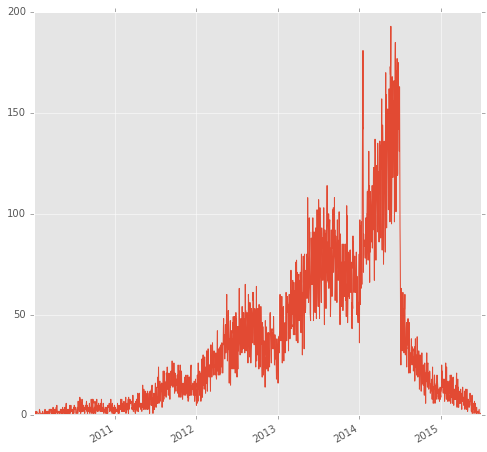

In [15]:
#graph of first booking dates
#drop in July 2014 - I think Airbnb reopened competition & added more data and/or reflects users slow to convert?
booked = users.booked.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
booked.value_counts().plot(kind='line', figsize = (8, 8))

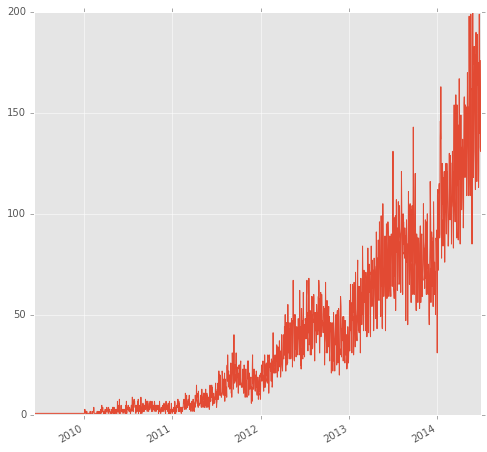

In [16]:
#graph of first active dates by frequency
active = users.active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
active.value_counts().plot(kind='line', figsize = (8, 8))

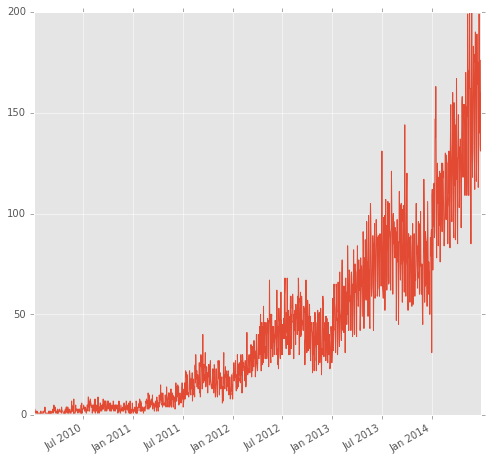

In [17]:
#graph of account created dates by frequency
account = users.account.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
account.value_counts().plot(kind='line', figsize = (8, 8))

In [18]:
#checking data before Jan 2013
users[users.booked < pd.to_datetime(20130101, format='%Y%m%d')]

,account,active,booked,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
yuuqmid2rp,2010-01-04,2010-01-04 19:42:51,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
v4d5rl22px,2010-01-07,2010-01-07 20:45:55,2010-01-08,FEMALE,33.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA


In [19]:
#percent of data that is from before Jan 2013
(16661.00/213451.00)*100

7.805538507666865

In [20]:
#checking data after Jun 2014
users[users.booked > pd.to_datetime(20140630, format='%Y%m%d')].count()

account                    6355
active                     6355
booked                     6355
gender                     6355
age                        6355
signup_method              6355
signup_flow                6355
language                   6355
affiliate_channel          6355
affiliate_provider         6355
first_affiliate_tracked    6355
signup_app                 6355
first_device_type          6355
first_browser              6355
country_destination        6355
dtype: int64

In [21]:
#percent of data that is from after June 2014
(6355.00/213451.00)*100

2.977264102768317

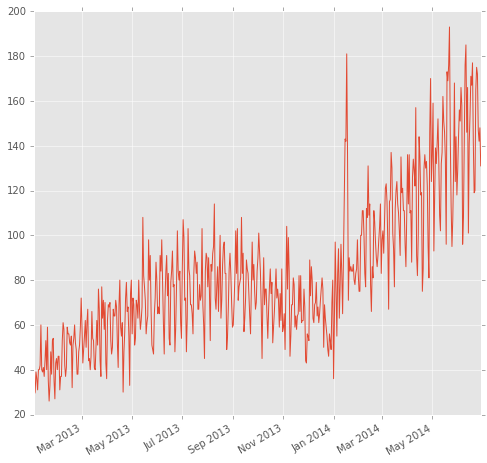

In [22]:
#graph of first booking Jan 2013 - June 2014

users = users[users['booked'] > pd.to_datetime(20130101, format='%Y%m%d')]
users = users[users['booked'] < pd.to_datetime(20140630, format='%Y%m%d')]
booked = users.booked.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
booked.value_counts().plot(kind='line', figsize = (8, 8))
plt.show()

In [23]:
#checking date range (1/2/2013 - 6/29/2014)
users.booked.describe()

count                   44976
unique                    544
top       2014-05-22 00:00:00
freq                      193
first     2013-01-02 00:00:00
last      2014-06-29 00:00:00
Name: booked, dtype: object

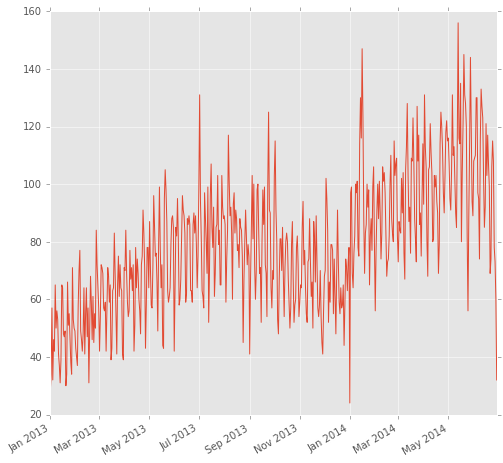

In [24]:
#graph of first active Jan 2013 - June 2014

users = users[users['active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users = users[users['active'] < pd.to_datetime(20140630, format='%Y%m%d')]
active = users.active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
active.value_counts().plot(kind='line', figsize = (8, 8))
plt.show()

In [25]:
#checking date range (1/1/2013 - 6/29/2014)
users.active.describe()

count                   42914
unique                  42914
top       2014-03-16 22:26:35
freq                        1
first     2013-01-01 00:47:49
last      2014-06-29 23:16:42
Name: active, dtype: object

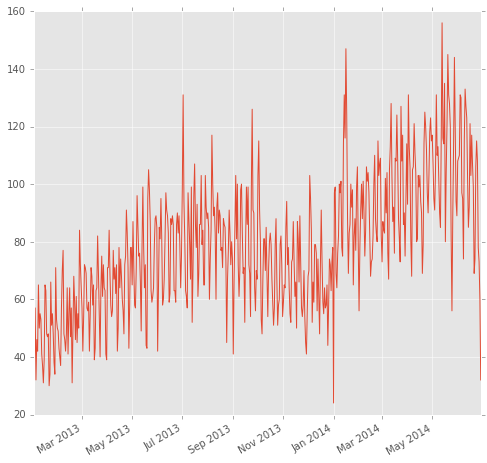

In [26]:
#graph of account created Jan 2013 - June 2014

users = users[users['account'] > pd.to_datetime(20130101, format='%Y%m%d')]
users = users[users['account'] < pd.to_datetime(20140630, format='%Y%m%d')]
account = users.account.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
account.value_counts().plot(kind='line', figsize = (8, 8))
plt.show()

In [27]:
#checking date range (1/1/2013 - 6/29/2014)
users.account.describe()

count                   42886
unique                    544
top       2014-05-13 00:00:00
freq                      156
first     2013-01-02 00:00:00
last      2014-06-29 00:00:00
Name: account, dtype: object

In [28]:
users.count()

account                    42886
active                     42886
booked                     42886
gender                     42886
age                        42886
signup_method              42886
signup_flow                42886
language                   42886
affiliate_channel          42886
affiliate_provider         42886
first_affiliate_tracked    42886
signup_app                 42886
first_device_type          42886
first_browser              42886
country_destination        42886
dtype: int64

#### Gender 
Drop `-unknown-` (user didn't specify gender)

In [29]:
users.gender.value_counts()

FEMALE       18087
MALE         16228
-unknown-     8486
OTHER           85
Name: gender, dtype: int64

In [30]:
users = users[users.gender !='-unknown-']

users.gender.value_counts()

FEMALE    18087
MALE      16228
OTHER        85
Name: gender, dtype: int64

In [31]:
users.gender.isnull().sum()

0

#### Age
Drop ages under 18 and over 100

In [32]:
#basic stats - standard deviation is pretty high, also wacky min and max ages
users.age.describe()

count    34400.000000
mean        47.635087
std        149.157832
min          2.000000
25%         28.000000
50%         33.000000
75%         41.000000
max       2014.000000
Name: age, dtype: float64

In [33]:
#checking NaNs 
users.age.isnull().sum()

0

In [34]:
#checking under 18
sum(users.age < 18)

5

In [35]:
#just double checking my code ;)
users[ users.age < 18 ]

,account,active,booked,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
ac60nc2h3h,2013-05-17,2013-05-17 03:53:09,2013-06-07,MALE,17.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,US
78ztkxfz48,2013-07-08,2013-07-08 01:47:15,2013-07-11,FEMALE,2.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Firefox,US
fpar5q9urf,2014-01-11,2014-01-11 00:41:34,2014-01-26,MALE,15.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
p1ulwalqpb,2014-05-21,2014-05-21 11:02:18,2014-05-25,FEMALE,17.0,facebook,0,fr,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,GB
10pnfxyqwp,2014-05-24,2014-05-24 07:44:10,2014-06-09,FEMALE,16.0,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,US


In [36]:
#checking over 100
sum(users.age > 100)

529

In [37]:
#setting over 100 & under 18 to NaN
users.loc[users.age > 100, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan

In [38]:
#checking NaNs again to check the math
users.age.isnull().sum()

534

In [39]:
#this looks better now
users.age.describe()

count    33866.000000
mean        35.710595
std         11.254757
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max        100.000000
Name: age, dtype: float64

In [40]:
users.dropna(inplace = True, subset = ['age'])

In [41]:
users.age.isnull().sum()

0

#### Signup Method
Nothing to do here... did consider dropping Google but doesn't feel right

In [42]:
users.signup_method.value_counts()

basic       20600
facebook    13236
google         30
Name: signup_method, dtype: int64

#### Signup Flow
Hmmm looks like we got some outliers - maybe plotting will help? Not sure if I should get rid of them or not...

In [43]:
users.signup_flow.value_counts()

0     29620
25     1665
12     1528
24      682
23      259
21       63
8        48
20        1
Name: signup_flow, dtype: int64

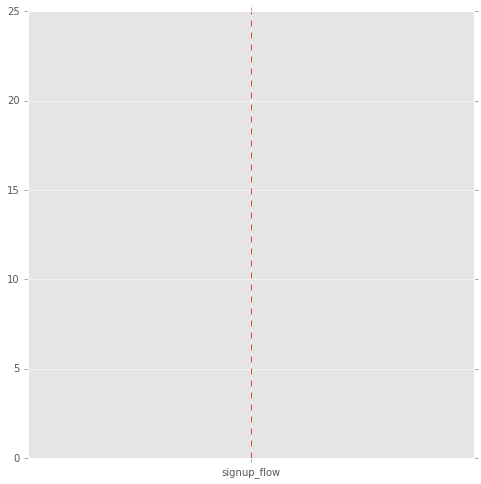

In [44]:
#why doesn't this work?
users.signup_flow.plot(kind = 'box', figsize = (8, 8))

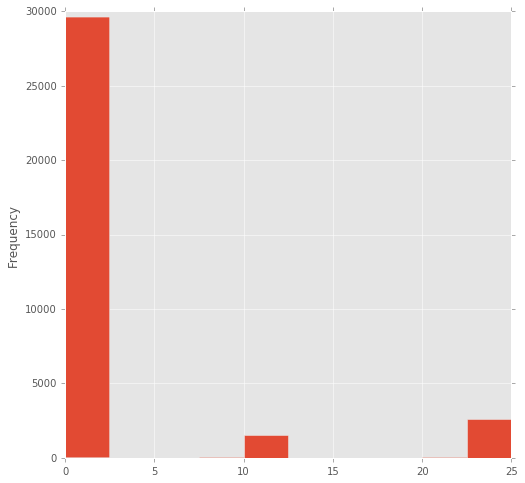

In [45]:
users.signup_flow.plot(kind = 'hist', figsize = (8, 8))

Not sure what to do so I'll just leave all the data here

#### Language
Again some low values that I'm not sure whether to keep or not

In [46]:
users.language.value_counts()

en    32927
zh      221
fr      170
es      116
de      103
ko       89
ru       51
it       41
ja       33
pt       29
sv       22
da       11
tr        9
nl        9
no        9
pl        8
el        5
cs        3
fi        3
hu        3
ca        2
is        1
th        1
Name: language, dtype: int64

#### Affiliate Channel
This looks fine... but potentially could regroup to simply `direct` and clump everything else into `other`

In [47]:
users.affiliate_channel.value_counts()

direct           22755
sem-brand         4959
sem-non-brand     2164
seo               1611
api               1390
other              708
content            158
remarketing        121
Name: affiliate_channel, dtype: int64

### Affiliate Provider
Combine `facebook-open-graph` with `facebook`

In [48]:
users.affiliate_provider.value_counts()

direct                 22755
google                  8159
other                   1869
facebook                 394
bing                     263
padmapper                139
yahoo                     76
facebook-open-graph       74
vast                      48
gsp                       24
meetup                    22
craigslist                16
email-marketing           13
naver                      7
baidu                      5
yandex                     2
Name: affiliate_provider, dtype: int64

In [49]:
users.affiliate_provider = users.affiliate_provider.str.replace('facebook-open-graph','facebook')

In [50]:
users.affiliate_provider.value_counts()

direct             22755
google              8159
other               1869
facebook             468
bing                 263
padmapper            139
yahoo                 76
vast                  48
gsp                   24
meetup                22
craigslist            16
email-marketing       13
naver                  7
baidu                  5
yandex                 2
Name: affiliate_provider, dtype: int64

#### First Affiliate Tracked
Drop `untracked`

In [51]:
users.first_affiliate_tracked.value_counts()

untracked        18356
linked            7619
omg               6877
tracked-other      789
product            179
marketing           41
local ops            5
Name: first_affiliate_tracked, dtype: int64

In [52]:
users = users[users.first_affiliate_tracked !='untracked']

users.first_affiliate_tracked.value_counts()

linked           7619
omg              6877
tracked-other     789
product           179
marketing          41
local ops           5
Name: first_affiliate_tracked, dtype: int64

#### Signup App 
Looks good

In [53]:
users.signup_app.value_counts()

Web        14802
iOS          385
Moweb        285
Android       38
Name: signup_app, dtype: int64

#### First Device Type
Drop `Other/Unknown`

In [54]:
users.first_device_type.value_counts()

Mac Desktop           8396
Windows Desktop       5555
iPad                  1098
iPhone                 248
Desktop (Other)        101
Android Tablet          67
Android Phone           43
SmartPhone (Other)       1
Other/Unknown            1
Name: first_device_type, dtype: int64

In [55]:
users = users[users.first_device_type !='Other/Unknown']

users.first_device_type.value_counts()

Mac Desktop           8396
Windows Desktop       5555
iPad                  1098
iPhone                 248
Desktop (Other)        101
Android Tablet          67
Android Phone           43
SmartPhone (Other)       1
Name: first_device_type, dtype: int64

#### First Browser
Drop `unknown` but same issue here with low vales... also has the potential for grouping later on 

In [56]:
users.first_browser.value_counts()

Chrome                6140
Safari                4081
Firefox               2688
Mobile Safari         1318
IE                    1160
Chrome Mobile           48
Android Browser         24
Opera                   11
AOL Explorer             7
Chromium                 7
Silk                     7
Iron                     3
Maxthon                  3
IceWeasel                2
Apple Mail               2
Pale Moon                2
SiteKiosk                1
TenFourFox               1
TheWorld Browser         1
BlackBerry Browser       1
Stainless                1
-unknown-                1
Name: first_browser, dtype: int64

In [57]:
users = users[users.first_browser !='-unknown-']

users.first_browser.value_counts()

Chrome                6140
Safari                4081
Firefox               2688
Mobile Safari         1318
IE                    1160
Chrome Mobile           48
Android Browser         24
Opera                   11
AOL Explorer             7
Chromium                 7
Silk                     7
Iron                     3
Maxthon                  3
Apple Mail               2
IceWeasel                2
Pale Moon                2
TenFourFox               1
TheWorld Browser         1
SiteKiosk                1
BlackBerry Browser       1
Stainless                1
Name: first_browser, dtype: int64

#### Country Destination
According to some research I've done NDF values (see original value_counts above) here means the user has not yet booked? Weird, though I guess it could explain why the `booked` column had so many NaNs. But limited the date range took care of them.

In [58]:
users.country_destination.value_counts()

US       10919
other     1795
FR         860
IT         468
GB         408
ES         397
CA         211
DE         186
NL         132
AU          87
PT          45
Name: country_destination, dtype: int64

#### How much data have we lost?
Answer: a lot

In [59]:
users.count()

account                    15508
active                     15508
booked                     15508
gender                     15508
age                        15508
signup_method              15508
signup_flow                15508
language                   15508
affiliate_channel          15508
affiliate_provider         15508
first_affiliate_tracked    15508
signup_app                 15508
first_device_type          15508
first_browser              15508
country_destination        15508
dtype: int64

#### Doubling checking NaNs

In [60]:
users.isnull().sum()

account                    0
active                     0
booked                     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [61]:
#data lost
((213451.00-15508.00)/213451.00)*100

92.73463230436963

# Export to CSV

Will continue clean up & exploratory analysis in new notebook 

In [62]:
users['active'] = users['active'].dt.strftime('%Y-%m-%d:%H:%M:%S')

In [63]:
users['account'] = users['account'].dt.strftime('%Y-%m-%d')

In [64]:
users['booked'] = users['booked'].dt.strftime('%Y-%m-%d')

In [65]:
users.dtypes

account                     object
active                      object
booked                      object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [66]:
users.to_csv('datasets/airbnb_clean.csv', index_label = 'id')